In this document we&rsquo;ll work through a simple approach to estimating
Constant Frisch Elasticity (CFE) demand systems.

There are two prerequisites; the first is the `CFEDemands` python
module, which can be installed with a simple:



In [12]:
!pip install CFEDemands --pre

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The second prerequisite is a dataset including detailed information on
household expenditures and characteristics.  The structure of that
dataset is detailed in the next section.



## Data



Consider the case in which the data are saved in a google sheet; we&rsquo;ll
turn data from these into `pandas` dataframes.  
There are limits on the allowable size of google sheets (5 million
cells), so if your dataset is larger than this you&rsquo;ll need some other
mechanism to get your data into such dataframes.  Even in this latter
case you&rsquo;ll want your dataframes to have a structure that matches the
description given below.



### Structure of the Spreadsheet



An example spreadsheet can be found at
[https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/](https://docs.google.com/spreadsheets/d/13Ig5hZif-NSHtgkKRp_cEgKXk0lOsdUB2BAD6O_FnRo/).

This spreadsheet consists of two worksheets, labeled &ldquo;Expenditures&rdquo;
and &ldquo;Household Characteristics&rdquo;, respectively.

Each worksheet has the initial three columns labeled &ldquo;j&rdquo;, &ldquo;t&rdquo;, and
&ldquo;m&rdquo;; together these identify an observation uniquely.  The column &ldquo;j&rdquo;
should include a household id; the column &ldquo;t&rdquo; should include an
indicator for the year or period (for those of you with
cross-sectional data these will all take a common value, e.g., 2019);
the column &ldquo;m&rdquo; should be an indicator of &ldquo;market&rdquo;, which may be a
region identifier, or may take a single value (e.g., &ldquo;Malawi&rdquo;).

The triple (j,t,m) will serve as the index of some constructed
dataframes.  It is important not to have **too** many different values
for &ldquo;m&rdquo; (unless you have lots of RAM to play with).

Beyond the first three columns, the &ldquo;Expenditures&rdquo; worksheet should
have one column for each category of expenditures (e.g., &ldquo;Rice&rdquo;, &ldquo;Goat
meat&rdquo;, &ldquo;Millet&rdquo;,&#x2026;).

Beyond the first three columns, the &ldquo;Household Characteristics&rdquo; should
have columns corresponding to different elements of the vector of
observable characteristics $z$.  If the data allow, I recommend
constructing observables that match what I have in the ICRISAT data:
namely numbers of &ldquo;Men&rdquo;, &ldquo;Women&rdquo;, &ldquo;Boys&rdquo; and &ldquo;Girls&rdquo;; also the
logarithm of total household size (&ldquo;log HSize&rdquo;).



### From Sheet to DataFrame to Result Object



We begin by defining a dictionary that contains the spreadsheet key. 
One is provided for the Indian ICRISAT example that I wish to work
through.



In [13]:
Sheets = {'Ethiopia Data':'1fYAqhN1VZoIazhopoJkUfVJPdVruF7sXZy286QDccaw',
         # 'Your dataset':'Your google spreadsheet key',
         }

With the spreadsheet defined , grab it and define a couple of
dataframes. Note that the spreadsheet must be public for this approach
to work!



In [14]:
import pandas as pd
import numpy as np

# The function below adapted from Gianmario Spacagna's suggestion at
# https://stackoverflow.com/questions/19611729/getting-google-spreadsheet-csv-into-a-pandas-dataframe
def dataframe_from_gspreadsheet(sheet_name, key):
    """Transform public google spreadsheet into pandas.DataFrame."""
    
    url = 'https://docs.google.com/spreadsheets/d/{key}/gviz/tq?tqx=out:csv&sheet={sheet_name}&headers=1'.format(
        key=key, sheet_name=sheet_name.replace(' ', '%20'))

    df = pd.read_csv(url)

    return df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

# Change 'ICRISAT' to key of your own sheet in Sheets, above
x = dataframe_from_gspreadsheet("Expenditures", Sheets['Ethiopia Data'])

# Change 'ICRISAT' to key of your own sheet in Sheets, above
z = dataframe_from_gspreadsheet("Household Characteristics", Sheets['Ethiopia Data'])

# Assume a single market: (Comment this out to make each village its own market)
z['m'] = 1
x['m'] = 1

# Take logs of expenditures; call this y
y = np.log(x.replace(0,np.nan).set_index(['j','t','m']))

z.set_index(['j','t','m'],inplace=True)

This gives a dataframe of household characteristics $z$ with a simple structure.



In [15]:
z.head()

Girls  Boys  Women  Men  log Hsize
j            t    m                                    
1.010102e+12 2011 1      1     2      2    2   1.945910
                  1      2     2      1    1   1.791759
                  1      0     0      1    0   0.000000
                  1      2     0      2    0   1.386294
                  1      1     0      2    1   1.386294

Also a dataframe of log expenditures $y$ with a similarly simple
structure.  Note that any expenditures of zero are dropped and
replaced with a missing value indicator.



In [16]:
y.head()

Field Pea  Banana  Barley  Beef  Beer  Boye/Yam  Bula  \
j            t    m                                                           
1.010102e+12 2011 1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   
                  1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   
                  1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   
                  1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   
                  1         NaN     NaN     NaN   NaN   NaN       NaN   NaN   

                     Butter/ghee  Cassava  Chat / Kat  ...        Salt  \
j            t    m                                    ...               
1.010102e+12 2011 1          NaN      NaN         NaN  ...    0.000000   
                  1          NaN      NaN         NaN  ...   -0.693147   
                  1          NaN      NaN         NaN  ...   -0.693147   
                  1          NaN      NaN         NaN  ...   -0.693147   
                  1          NaN      NaN         NaN  ...   -2.995732   

                     Soft drinks/Soda   Sorghum     Sugar  Sweet potato  Tea  \
j            t    m                                                            
1.010102e+12 2011 1               NaN       NaN  2.890372           NaN  NaN   
                  1               NaN       NaN       NaN           NaN  NaN   
                  1               NaN       NaN  1.609438           NaN  NaN   
                  1               NaN  4.430817  2.890372           NaN  NaN   
                  1               NaN       NaN  2.890372           NaN  NaN   

                     Teff  Tella  Tomato  Wheat  
j            t    m                              
1.010102e+12 2011 1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  
                  1   NaN    NaN     NaN    NaN  

[5 rows x 57 columns]

## Estimation



With nothing more than this, we can estimate the demand system.  This
happens in two steps.  The first is the &ldquo;reduced form&rdquo; step:



In [17]:
import cfe

result = cfe.Result(y=y,z=z)

This creates a complicated &ldquo;Result&rdquo; object, with lots of different
attributes.  Note from below that attributes $y$ and $z$ are now defined.



In [18]:
result

<xarray.Result>
Dimensions:           (i: 57, j: 5221, k: 5, m: 1, t: 3)
Coordinates:
  * j                 (j) float64 1.01e+12 1.01e+12 ... 1.501e+13 1.501e+13
  * t                 (t) int64 2011 2013 2015
  * m                 (m) int64 1
  * i                 (i) <U40 ' Field Pea' 'Banana' ... 'Tomato' 'Wheat'
  * k                 (k) <U9 'Girls' 'Boys' 'Women' 'Men' 'log Hsize'
Data variables:
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 1.0 3.0 0.0 2.0 ... 1.609 1.609 1.386
    loglambdas        object None
    a                 object None
    yhat              object None
    ce                object None
    cehat             object None
    e                 object None
    delta_covariance  object None
    se_delta          object None
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y

### First step of Estimation



Recall that there are two steps to estimation; the first step
involves estimating the &ldquo;reduced form&rdquo; linear regression 
$$
y_{it}^j = {a}_{it} + \delta_i'{z}^j_t + \epsilon_{it}^j.
$$

The Result class has code to estimate this in one line:



In [19]:
result.get_reduced_form()

After running this we can examine the estimated coefficients $\delta$:



In [20]:
result.delta.to_dataframe().unstack('k')

delta                                        
k                  Boys     Girls       Men     Women log Hsize
i                                                              
Banana        -0.046465 -0.027516  0.100684  0.100631  0.037643
Barley        -0.036725  0.019442  0.030272  0.068410  0.203424
Chat / Kat     0.042390  0.101619  0.113146  0.063846 -0.184452
Chick Pea     -0.009955 -0.037127  0.027662 -0.001537  0.436727
Coffee        -0.018892 -0.007446  0.050441  0.058091  0.149379
Eggs          -0.072915 -0.049933  0.060729  0.066568  0.181996
Haricot Beans  0.070014  0.045089  0.089340  0.067902  0.240266
Horsebeans     0.017022  0.000133  0.088256  0.010798  0.281787
Lentils       -0.005120  0.002604  0.080905  0.057819  0.189585
Maize          0.099865  0.076483  0.110515  0.041131  0.295994
Milk           0.070075  0.068764  0.023148  0.078315  0.104570
Onion         -0.026366 -0.001955  0.060377  0.077737  0.131379
Potato         0.001614  0.008574  0.036573  0.012320  0.217222
Salt           0.007962  0.017786  0.024780  0.017933  0.243276
Sorghum        0.097956  0.051453  0.023077 -0.028677  0.292220
Sugar          0.045267  0.067821  0.033807  0.042121  0.142283
Teff          -0.028223 -0.034798  0.117397  0.060323  0.381324
Wheat          0.062311  0.037040  0.040339  0.004006  0.408268

Also the good-time constants $a_{it}$:



In [21]:
result.a.to_dataframe().unstack('i')

a                                                     \
i         Banana    Barley Chat / Kat Chick Pea    Coffee      Eggs   
t    m                                                                
2011 1  1.417011  2.359646   3.995692  2.068716  2.686291  2.262999   
2013 1  1.764609  2.342961   4.156780  1.875913  2.550958  2.505772   
2015 1  2.211424  2.486037   4.359188  2.176062  2.610751  2.652504   

                                                                         \
i      Haricot Beans Horsebeans   Lentils     Maize      Milk     Onion   
t    m                                                                    
2011 1      1.999015   2.278911  2.334429  2.611504  2.670019  1.746679   
2013 1      1.919101   1.956810  2.318558  2.444873  2.777178  1.879957   
2015 1      1.928639   2.386165  2.962893  2.390487  2.983815  2.043086   

                                                                    
i         Potato      Salt   Sorghum     Sugar      Teff     Wheat  
t    m                                                              
2011 1  1.737960  0.288674  2.739585  2.254695  3.316159  2.929938  
2013 1  1.860584  0.506289  2.749927  2.218531  3.376121  2.820785  
2015 1  2.078106  0.573368  2.765148  2.191508  3.807429  2.857619

### Second step of Estimation



The second step involves using Singular Value Decomposition to find
the rank one matrix that best approximates the residuals $e_{it}^j$.
This can be interpreted as
$$
    -\beta_i\log\lambda^j_t,
$$
where the $\log\lambda^j_t$ is the log of the marginal utility of
expenditures (MUE) for household $j$ at time $t$, and where $\beta_i$ are
the corresponding &ldquo;Frisch elasticities&rdquo; that tell us how much
demand changes as the MUE falls.

Estimates can also be computed as a one-liner:



In [22]:
result.get_beta().to_dataframe()

,beta
i,
Banana,0.728435
Barley,1.471322
Chat / Kat,0.795466
Chick Pea,1.149818
Coffee,0.586800
Eggs,0.360648
Haricot Beans,1.106614
Horsebeans,0.938807
Lentils,0.659474


That&rsquo;s all there is to estimation!  Note that we didn&rsquo;t estimate
demands for all goods&#x2014;lots of goods didn&rsquo;t have enough observations,
and were automatically dropped.  (This can be controlled using the
`min_proportion_items` and `min_xproducts` attributes when one
instantiates the result object.)



### Assessment of Fit



Now, let&rsquo;s see how we did, by comparing total expenditures predicted by the
model we&rsquo;ve estimated with actual total expenditures:



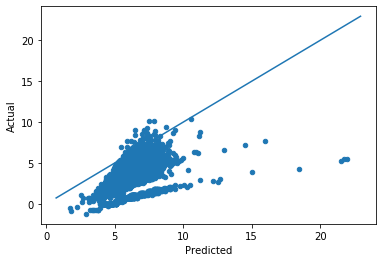

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])